# Convolutional Neural Networks

## And some practical techniques for training them 

Spencer Bertsch <br>
ENGG 192 - Dartmouth College <br>
Winter 2019 

In this notebook I will discuss what differentiates convolutional neural networks from dense, fully connected networks and why they are so effective at solving certain tasks. In our discussion, we will use MNIST as our dataset. 



### Sources

[Keras-model-training-history](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

[Keras Team - Github](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py)


## Imports


In [17]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt 

## Load and shape the dataset 

In [18]:
#Load the dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data()


data1 = x_train #for visualization
data2 = y_train #for visualization

"""
Our images are greyscale, which means they are two dimensional. We have many image samples, however, so our dataset is three dimensional. 
Our neural netowrk, specifically the 'conv2d' layer, is expecting a four dimensional input for - image samples, [rows, cols] for each image, and the RGB pixel 
value for each pixel in the image. Becasue our images are greyscale, we have a single value for the RGB: intensity (between 0 and 1). Therefor, we need to 
reshape our data to include an additional (1) which will tell our neural network that the image has only one value for each pixel representing intensity. 
We can achieve this by using the below if-else statement. 
"""

if K.image_data_format() == 'channels_first': #<-- checking the Keras backend to determine whether K.image_data_format() is "channels_last" or "channels_first"
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    
print("Shape of original data: ", data1.shape)
print("Shape of reshaped data: ", x_train.shape)

Shape of original data:  (60000, 28, 28)
Shape of reshaped data:  (60000, 28, 28, 1)


LABEL:  0


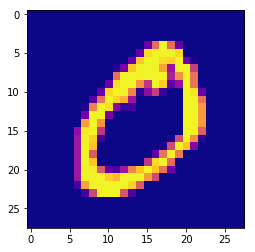

In [19]:
print("LABEL: ", data2[1])
fig = plt.imshow(data1[1, :, :], cmap = plt.cm.plasma);

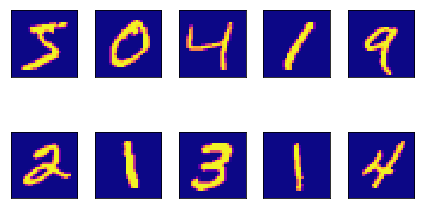

In [20]:
for i in range(10):
    plt.subplot(2,5,1+i)
    fig = plt.imshow(data1[i, :, :], cmap = plt.cm.plasma);
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    
plt.tight_layout()

In [21]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print("We can see that we have",x_train.shape[0], 'train samples')
print("And we have", x_test.shape[0], 'test samples')
print("And each image is", x_test.shape[1], "by", x_test.shape[2] ,'pixels')

x_train shape: (60000, 28, 28, 1)
We can see that we have 60000 train samples
And we have 10000 test samples
And each image is 28 by 28 pixels


## Define network parameters 

In [22]:
batch_size = 128
num_classes = 10
epochs = 2

## Encode our data 

Use the keras.utils to one-hot encode the label vector. Remember that we are simply recognizing handwritten, single digit numbers so we can tell keras.utils that we want an \[n x 10] matrix with each row containing only one 1 value and the rest 0 values. 

In [23]:
# input image dimensions
img_rows, img_cols = 28, 28

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Define the network 

--------

We're now ready to define the network with several convolutional, pooling, and dropout layers, ending with a dense, fully connected layer with a softmax activation function which will yeild our final classification. 

In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) #<-- We have 10 classes to predict from 

## Compile our model

In [25]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


## Fit the model to the data

In [26]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 106s 2ms/step - loss: 0.2636 - acc: 0.9187 - val_loss: 0.0639 - val_acc: 0.9797
Epoch 2/2
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0879 - acc: 0.9737 - val_loss: 0.0411 - val_acc: 0.9855
Test loss: 0.04114919487060979
Test accuracy: 0.9855


# Model Evaluation

--------

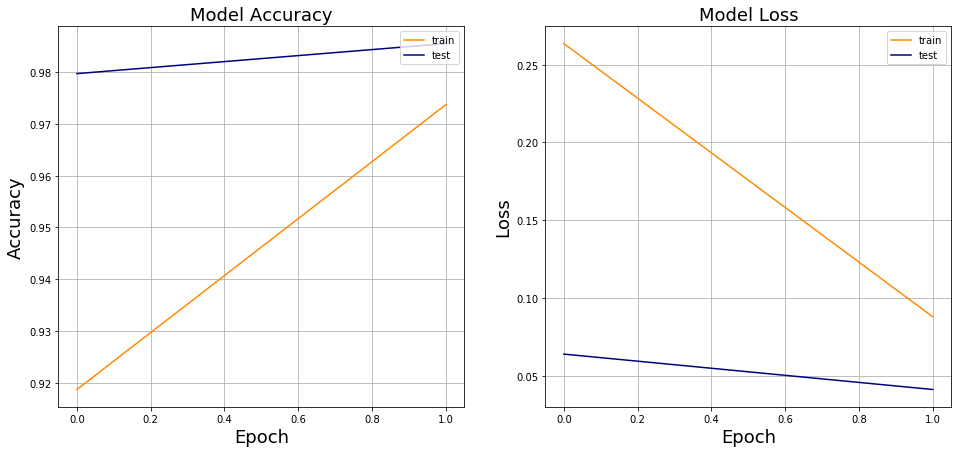

In [55]:
#Plot Accuracy
fig = plt.figure(figsize=(16, 7))
ax1 = fig.add_subplot(121)

plt.plot(history.history['acc'], color='darkorange', label = 'train')
plt.plot(history.history['val_acc'], color='navy', label = 'test')
plt.legend(loc='upper right');
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.title('Model Accuracy', fontsize = 18)
plt.grid()


#Plot Loss
#fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_subplot(122)

plt.plot(history.history['loss'], color='darkorange', label = 'train')
plt.plot(history.history['val_loss'], color='navy', label = 'test')
plt.legend(loc='upper right');
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Loss', fontsize = 18)
plt.title('Model Loss', fontsize = 18)
plt.grid()
